In [19]:
from typing import TypedDict, Dict
# framework that helps you design and manage the flow of tasks in your application using a graph structure
from langgraph.graph import StateGraph

In [20]:
# we now create an AgentState - shared data structure that keeps track of information as your application runs
class AgentState(TypedDict):    # our state schema
    message: str

def greeting_node(state: AgentState) -> AgentState:
    """ simple node that adds a greeting message to the state """
    # TypedDict的键(key)总是字符串类型, 不加引号, 会理解message为一个变量
    state["message"] = f"Hey, {state['message']} + , how is your day going?"
    return state

def answer_node(state: AgentState) -> AgentState:
    state['message'] = f"{state['message']} \nGreat, what about you?"
    return state


In [21]:
graph = StateGraph(AgentState)

graph.add_node('greeter', greeting_node)
graph.add_node('answer', answer_node)
graph.add_edge('greeter', 'answer')
graph.set_entry_point('greeter')
graph.set_finish_point('greeter')

app = graph.compile()

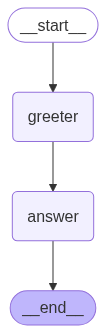

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
# 最后一个node应该返回一个AgentState
result = app.invoke({'message': 'Mina'})

In [24]:
print(result['message'])

Hey, Mina + , how is your day going?
Great, what about you? 
Great, what about you?
